# Multiclass Classification

In this segment, we will explore an example of multiclass classification using neural networks.
First, we import the required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

Neural Networks are frequently used to classify data. An example of a neural network is a model that takes in photos and classify subjects in the photos as {dog,cat,etc}

A network of this type will often have multiple units in its final layer. Each output is associated with a category. When an input example is added to the network, the output with the highest value is the category predicted. If the output is applied to a softmax function, the output of the softmax will provide probabilities of the input being in each category.

First, we create a four-class data set.

## Prepare and Visualize the data

We use Scikit-Learn `make_blobs()` function to make a training dataset with 4 categories as shown in the plot below:

In [3]:
# Create a 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=30)

c:\Users\patri\OneDrive\Desktop\Machine-Learning-Coursera\Advanced Learning Algorithms\Week 2\Multiclass Classification\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


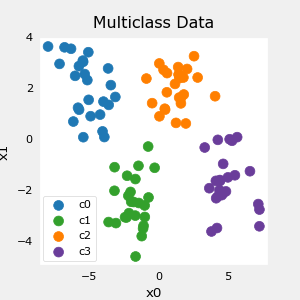

In [4]:
plt_mc(X_train, y_train, classes, centers, std=std)

Each dot is represented by a training example. The axes (x0,x1) are the inputs and the color represents the class the example is associated with. Once trained, the model will be presented with a new example, (x0,x1), and will predict the class.

While generated, this data set is representative of many real-world classification problems. There are several input features (x0,...,xn) and several output categories. The model is trained to use the input features to predict the correct output category.

In [5]:
# display classes in the dataset
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


## Model

The model is a 2-layer network. It has 4 outputs, one for each class. Given an input example, the output with the highest value is the predicted class of the input.

The code below illustrates how to construct the network in Tensorflow. The output layer uses a `linear` rather than a `softmax` function. This is because it is numerically stable if linear outputs are passed to the loss function during training. If the model is used to predict probabilities, the softmax can be applied at that point.

In [9]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(2, activation = 'relu', name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

Next, we compile and train the network. Setting `from_logits=True` as an argument to the loss function specifies that the output activation was linear rather than softmax.

In [10]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)
model.fit(
    X_train, y_train,
    epochs=200
)

Epoch 1/200
4/4 [==============================] - 1s 9ms/step - loss: 1.2368
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 1.1886
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 1.1467
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 1.1143
Epoch 5/200
4/4 [==============================] - 0s 8ms/step - loss: 1.0847
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 1.0635
Epoch 7/200
4/4 [==============================] - 0s 11ms/step - loss: 1.0458
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0294
Epoch 9/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0174
Epoch 10/200
4/4 [==============================] - 0s 15ms/step - loss: 1.0072
Epoch 11/200
4/4 [==============================] - 0s 9ms/step - loss: 0.9980
Epoch 12/200
4/4 [==============================] - 0s 8ms/step - loss: 0.9896
Epoch 13/200
4/4 [==============================] - 0s 8ms

With the trained model, we can visualize how the model has classified the training data.

184/184 [==============================] - 1s 4ms/step


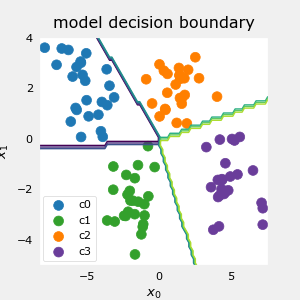

In [11]:
plt_cat_mc(X_train, y_train, model, classes)

From the plot, the decision boundaries show how the model has partitioned the input space.

Below, we will pull the trained weights from the model and use that to plot the function of each of the network units. 

In [12]:
# Obtain the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

c:\Users\patri\OneDrive\Desktop\Machine-Learning-Coursera\Advanced Learning Algorithms\Week 2\Multiclass Classification\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
c:\Users\patri\OneDrive\Desktop\Machine-Learning-Coursera\Advanced Learning Algorithms\Week 2\Multiclass Classification\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


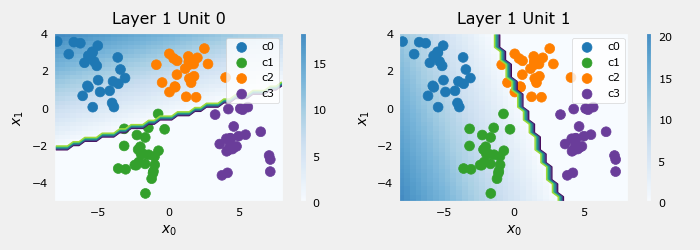

In [13]:
# Plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

c:\Users\patri\OneDrive\Desktop\Machine-Learning-Coursera\Advanced Learning Algorithms\Week 2\Multiclass Classification\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
c:\Users\patri\OneDrive\Desktop\Machine-Learning-Coursera\Advanced Learning Algorithms\Week 2\Multiclass Classification\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
c:\Users\patri\OneDrive\Desktop\Machine-Learning-Coursera\Advanced Learning Algorithms\Week 2\Multiclass Classification\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
c:\Users\patri\OneDrive\Desktop\Machine-Learning-Coursera\Advanced Learning Algorithms\Week 2\Multiclass Classifica

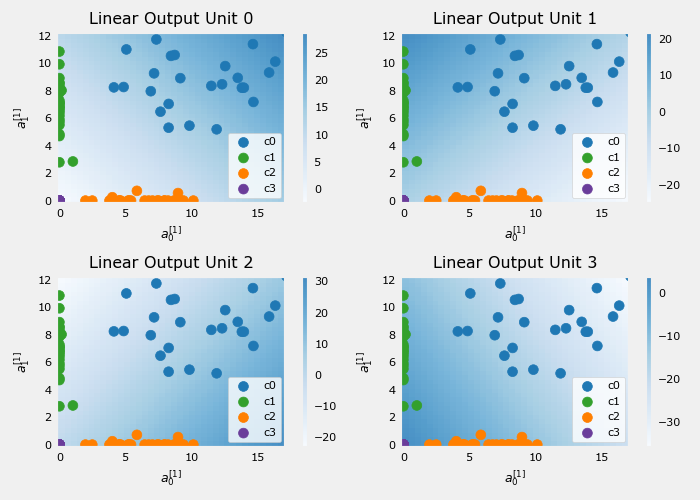

In [15]:
# Obtain the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()

# Create the 'new features', the training examples after L1 transformation
xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(xl2, y_train.reshape(-1,), W2, b2, classes, 
                        x0_rng = (-0.25,np.amax(xl2[:,0])), x1_rng = (-0.25, np.amax(xl2[:,1])))